# Part 3


In [99]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

### 1. sample N=10,000 data points from a Gaussian Distribution with parameters  u = 0 and sigma = 4, using the np.random.standard_normal() function. Store your data in a numpy array X. 

In [100]:
mu, sigma = 0, 4 # mean and standard deviation
X = np.random.normal(mu, sigma, 10000)

## 2. Plot the distribution of the data in X

In [101]:
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 300
    
setup_mpl()

In [102]:
min(X), max(X)

(-16.001981989577946, 14.768616065389839)

Text(0, 0.5, 'count')

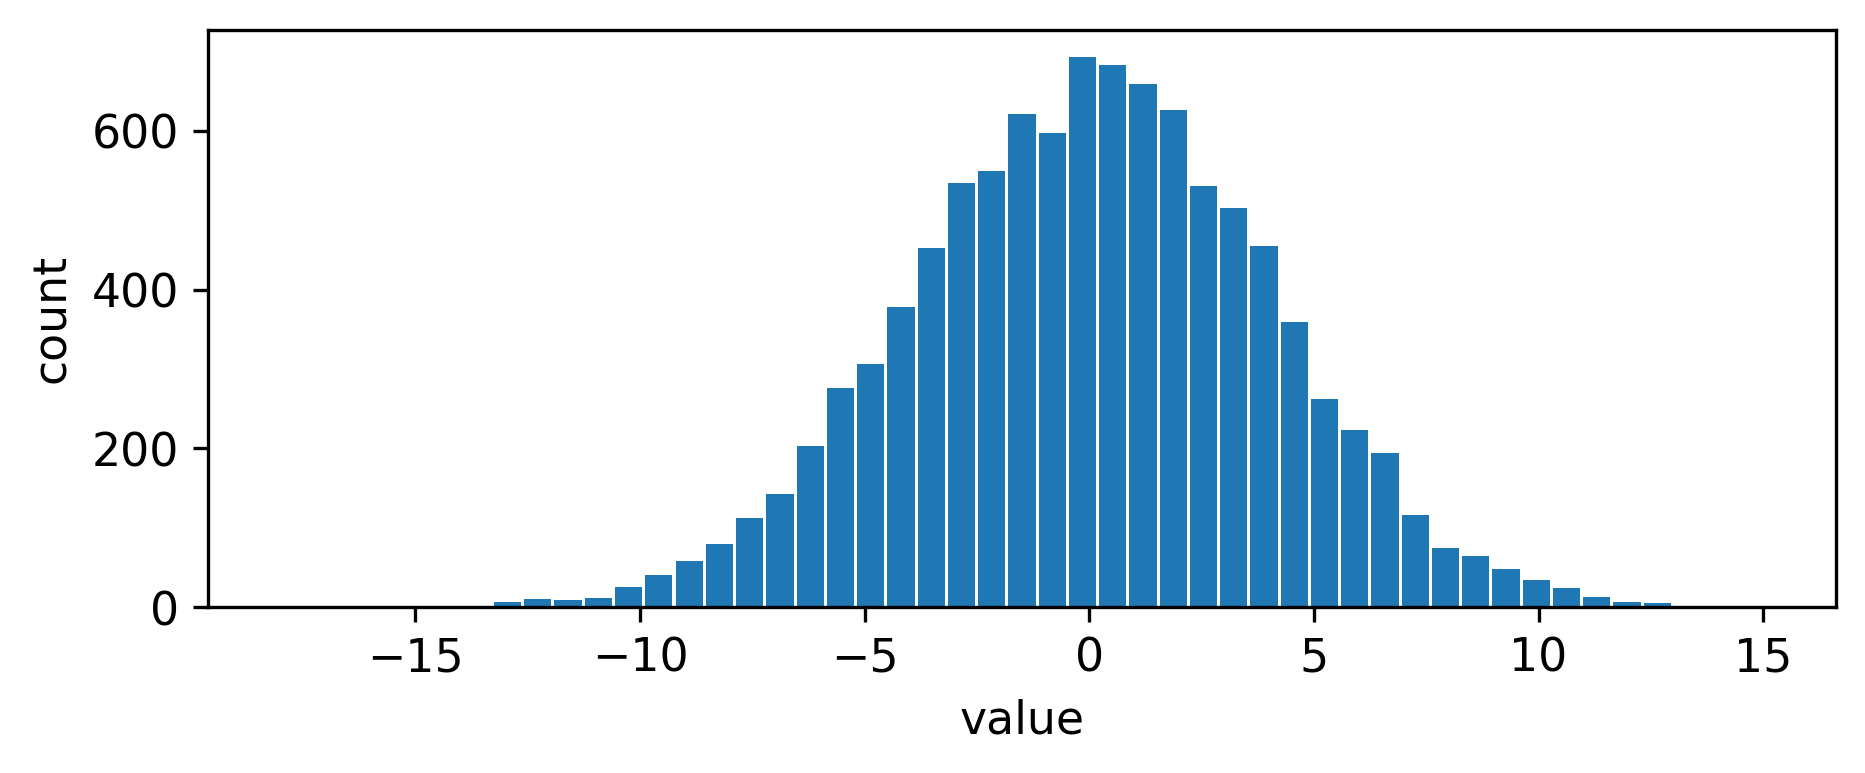

In [103]:
bins = np.linspace(-18, 15, 50)
hist, edges = np.histogram(X, bins = bins)
x = (edges[1:]+edges[:-1])/2
width = bins[1]-bins[0]

fig, ax = plt.subplots()
ax.bar(x, hist, width = width *0.9)
ax.set_xlabel('value')
ax.set_ylabel('count')

## 3. Compute the cumulative average of X for each index. Store the result in an array.

In [104]:
i = np.linspace(1, X.size, X.size)
X_cum_avg = X.cumsum()/i
#X_cum_avg

## 4. compute the cumulative standard error of X.

In [105]:
#cumulative standard deviation
X_cum_std =[X[:element].std() for element in range(1,len(X)+1)]
#X_cum_std

## 5. Compute the values of the distribution mean and median

In [106]:
print(X.mean())
print(np.median(X))

0.012958233661815408
0.06929368020562321


## 6.-12. Plot the cumulative mean and cummulative median for the Gaussian distribution. Sample N=10,000 data points from the Pareto and Log-Normal distribution. Calculate the mean and median for both and repeat the plots for both.

#### Define a function to compute the disribution mean and median and to do the three plots 

In [172]:
def exercise3_GPT(X, x_log, y_log, bar_hist):
#pass array X and x_log and y_log boolean. bar_hist specifies whether the histogram is a bar plot (True) or a line plot (False)
    
    # 1. Create histogram
    bins = np.linspace(math.floor(min(X)), math.ceil(max(X)), 50)
    if x_log:
        bins = np.logspace(0, np.log10(math.ceil(max(X))), 50)
    hist, edges = np.histogram(X, bins = bins, density = True)
    x = (edges[1:]+edges[:-1])/2
    width = bins[1]-bins[0]

    fig, ax = plt.subplots()
    if bar_hist:
        ax.bar(x, hist, width = width *0.9)
    else:
        ax.plot(x, hist, marker = '.')

    ax.set_xlabel('value')
    ax.set_ylabel('Probability distribution')
    if x_log:
        ax.set_xscale('log')
        
        
    #calculate cumulative mean                       
    i = np.linspace(1, X.size, X.size)
    X_cum_avg = X.cumsum()/i
    #calculate cumulative standard deviation (this might not be needed actually but to time to double-check)
    X_cum_std =[X[:element].std() for element in range(1,len(X)+1)]
    #calculate cumulative standard deviation
    X_cum_median =[np.median(X[:element]) for element in range(1,len(X)+1)]
    
    print('mean:' + str(X.mean()))
    print('median:' + str(np.median(X)))
    
    
    #6. Plot cumulative mean
    plt.figure()
    #plt.errorbar(x = range(X_cum_avg.size), y = X_cum_avg, yerr=X_cum_std, capsize=0, ecolor='k', linestyle='')
    plt.plot(X_cum_avg, linewidth=2)
    plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1) # add mean line
    plt.xlabel("Number of observation")
    plt.ylabel("Cumulative mean")
    if y_log:
        plt.yscale("log")    
        
    
    #8. Plot cumulative median
    plt.figure()
    plt.plot(X_cum_median)
    plt.plot([0, X.size], [X.mean(), X.mean()], color='k', linestyle='-', linewidth=1) # add mean line
    plt.xlabel("Number of observation")
    plt.ylabel("Cumulative median")
    if y_log:
        plt.yscale("log")

#### Normal/Gaussion distribution

mean:0.012958233661815408
median:0.06929368020562321


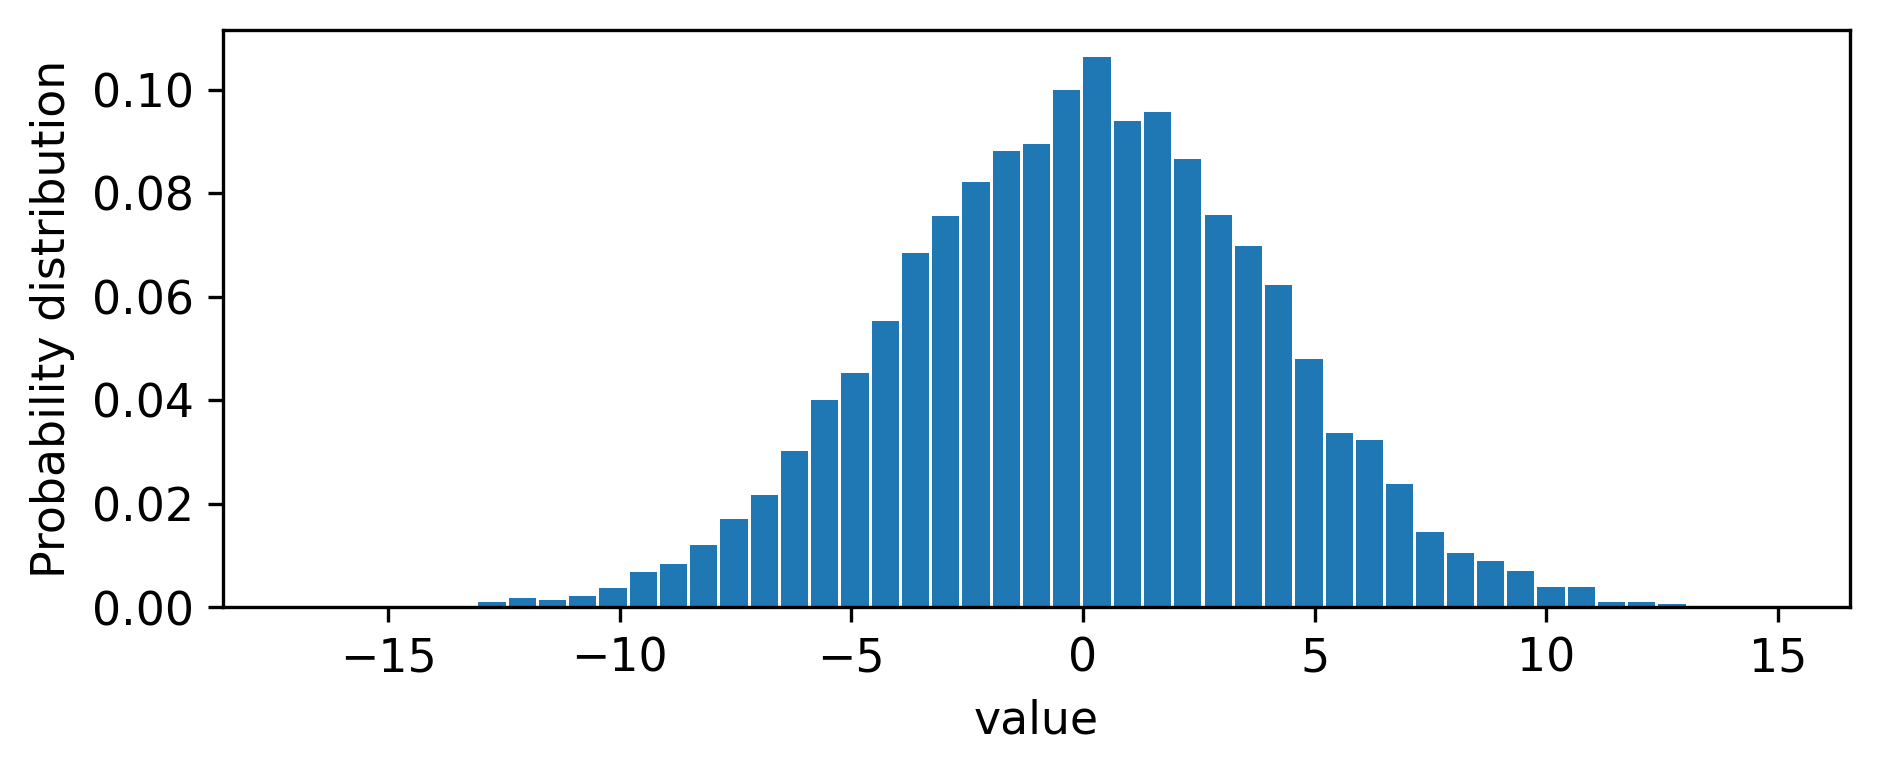

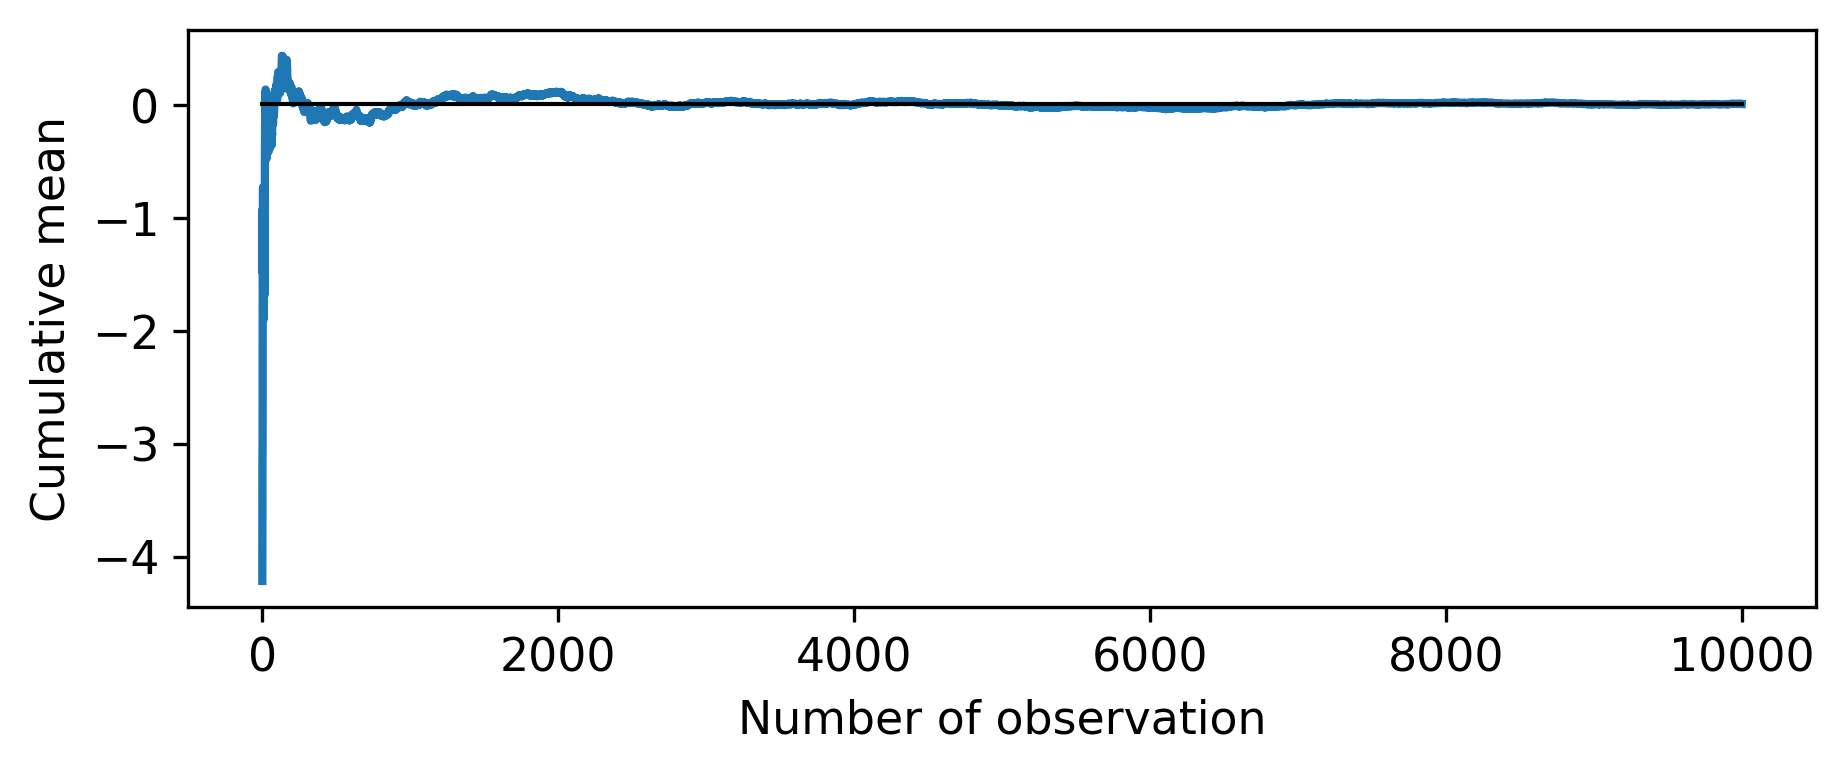

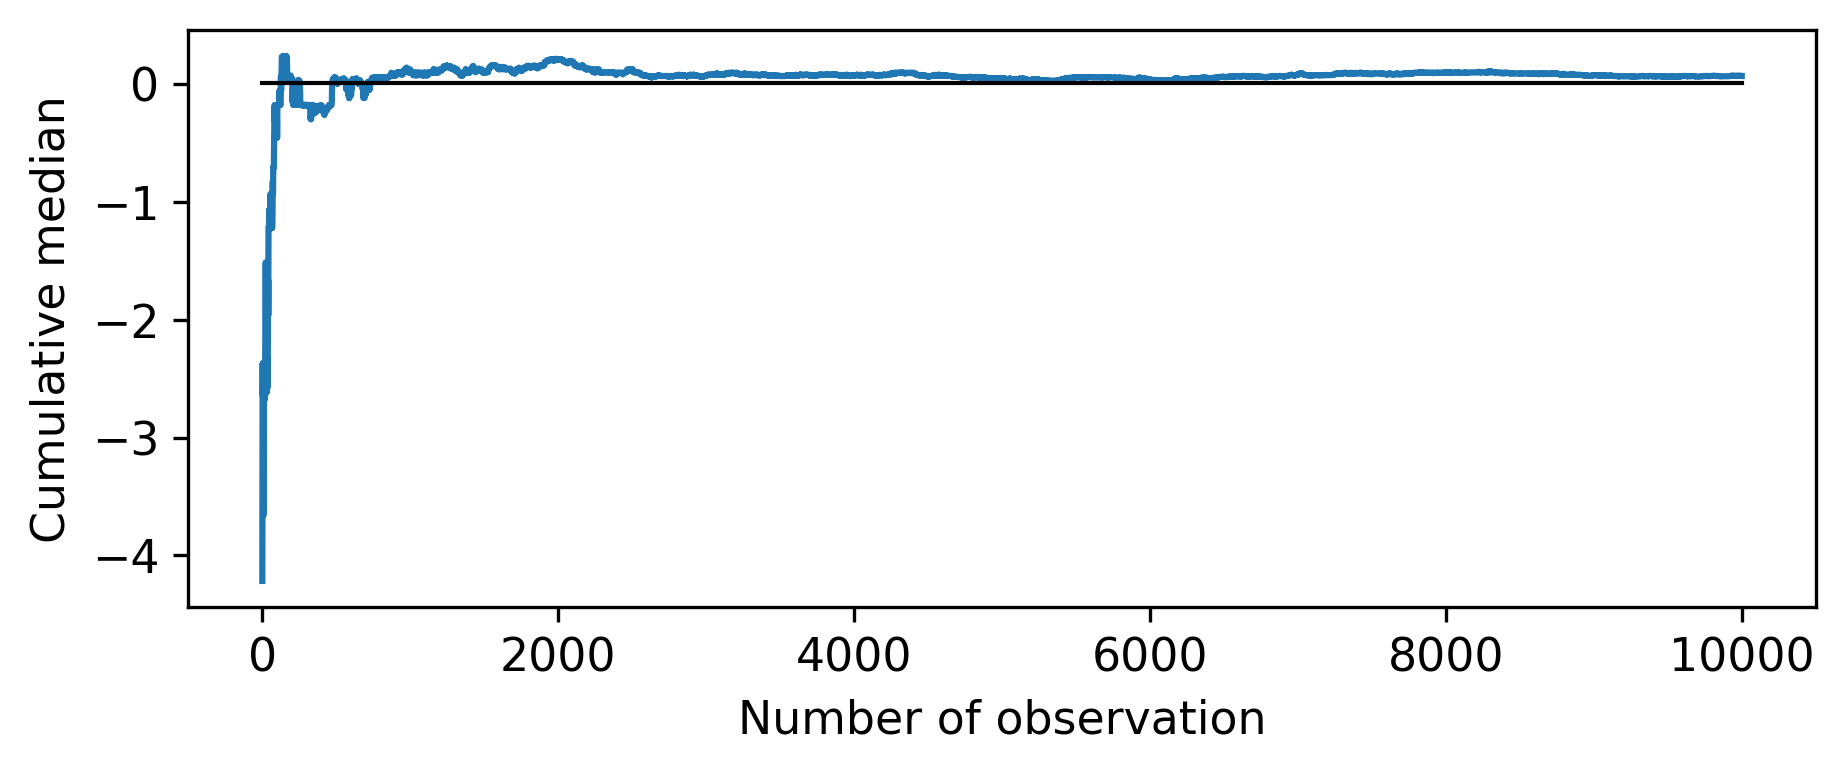

In [173]:
exercise3_GPT(X, x_log = False, y_log = False, bar_hist = True)

#### Pareto distribution

In [174]:
a, m = 0.5, 1  # shape and mode
X_pareto = (np.random.pareto(a, 10000) + 1) * m
#X_pareto

mean:15615.843926315225
median:3.915831773687609


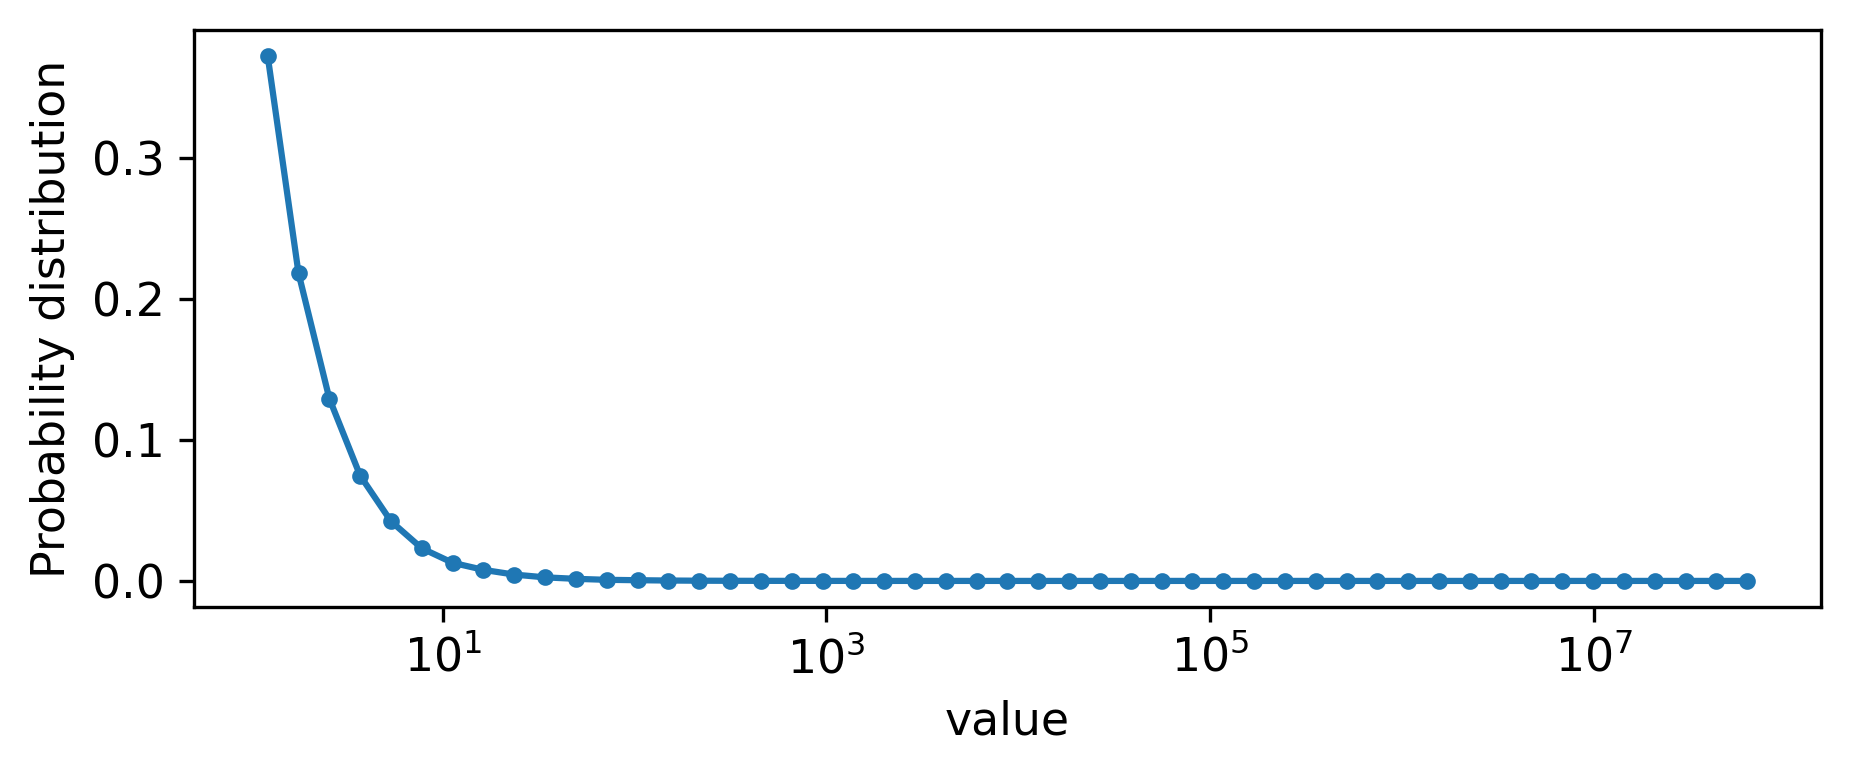

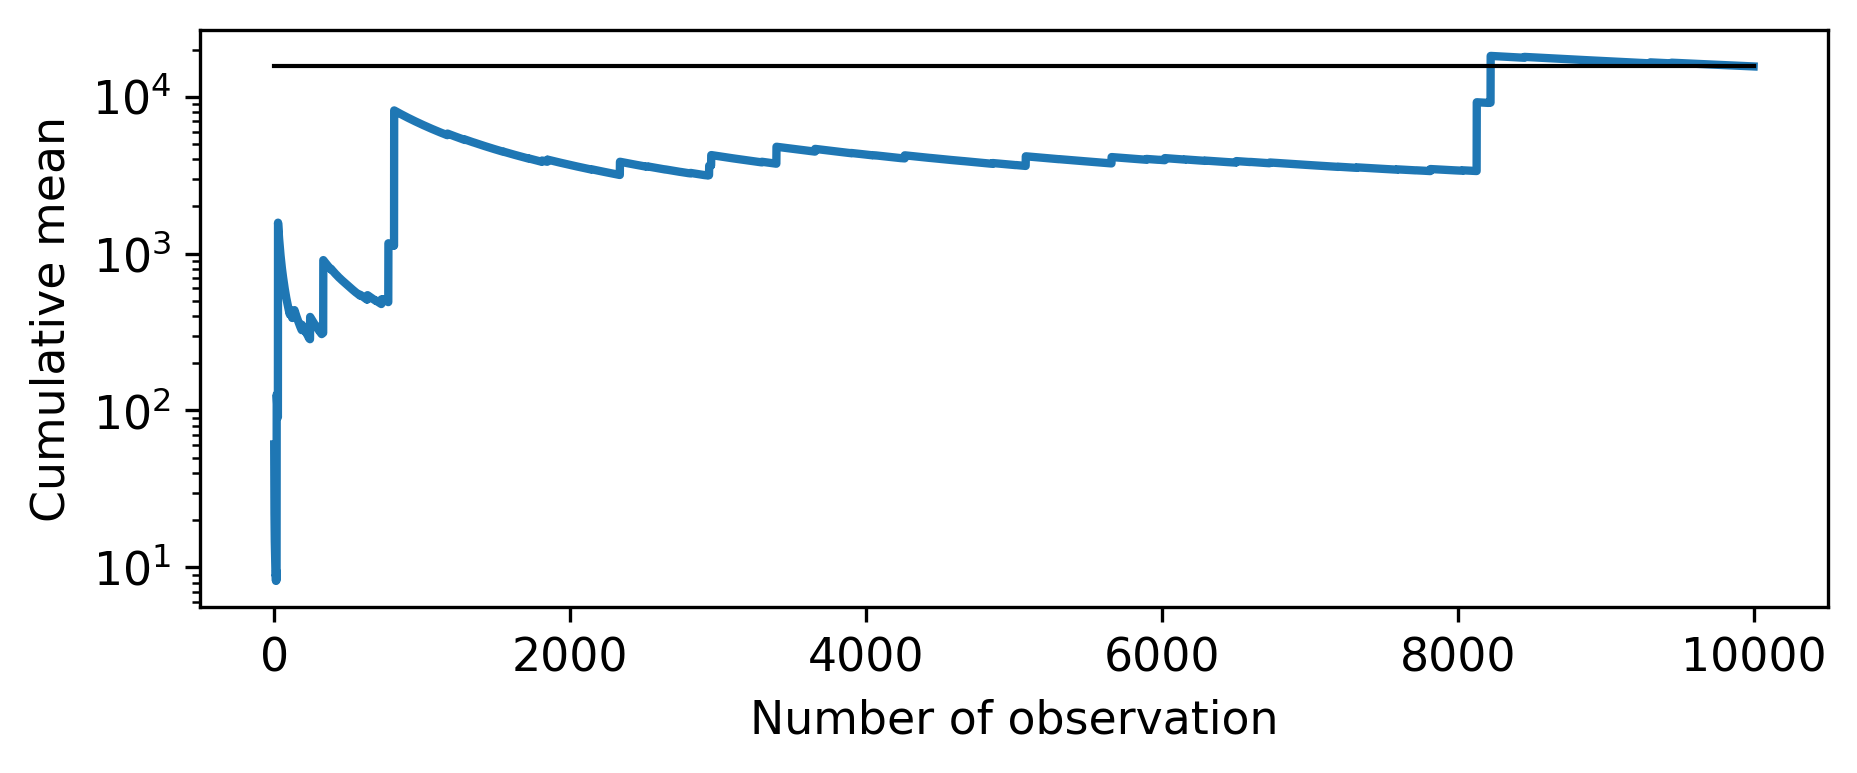

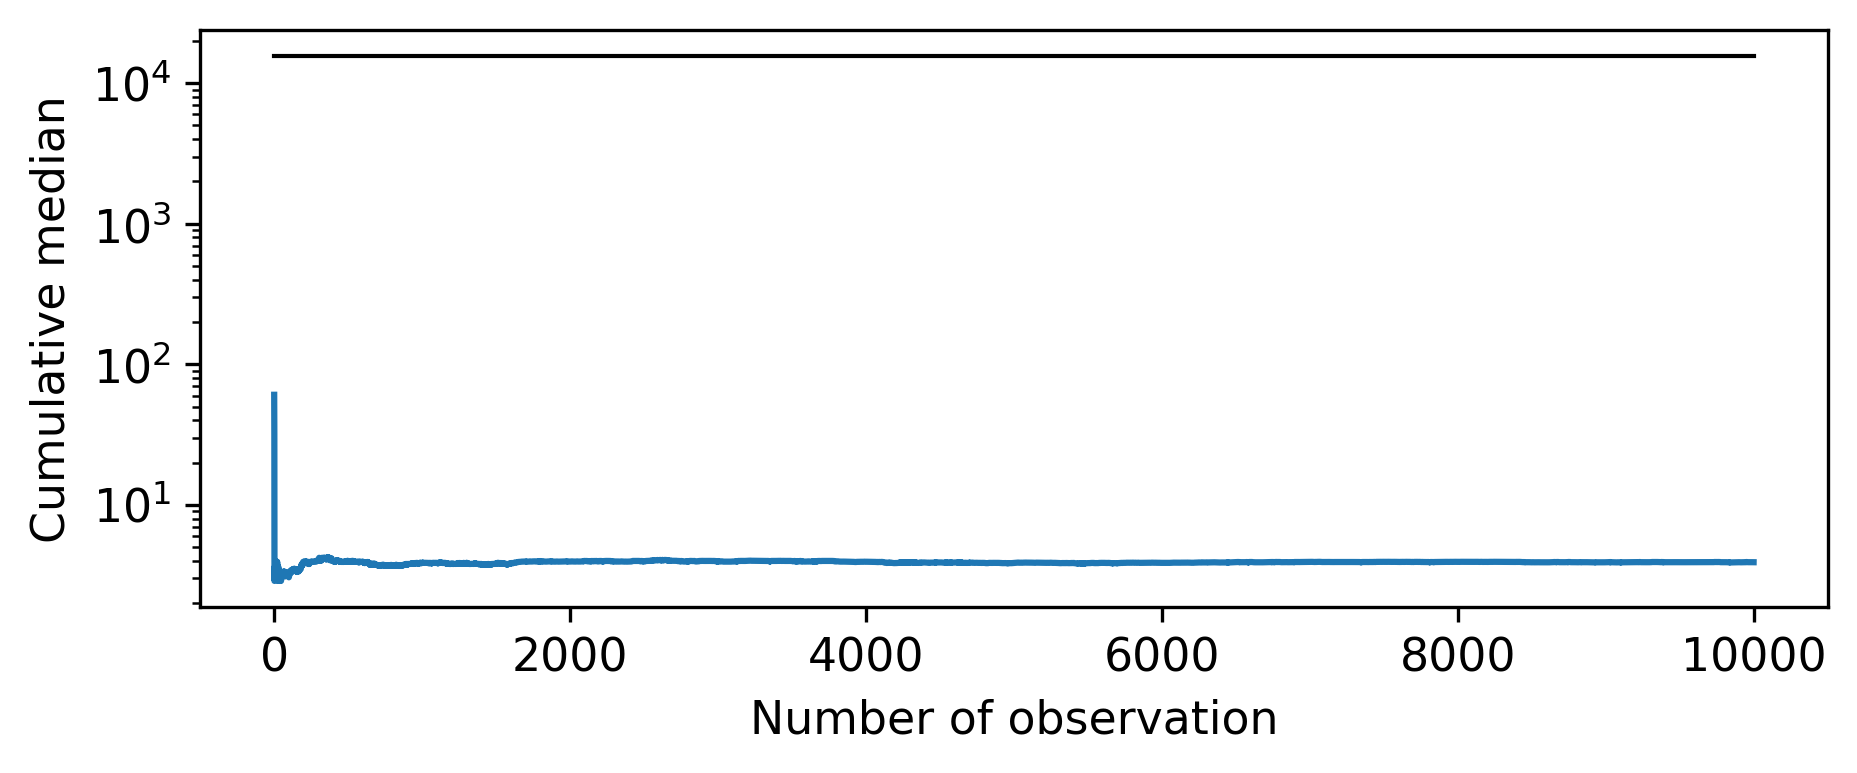

In [175]:
exercise3_GPT(X_pareto, x_log = True, y_log = True, bar_hist = False)

#### Log-Normal distribution

mean:947.9768795980435
median:0.974086735038039


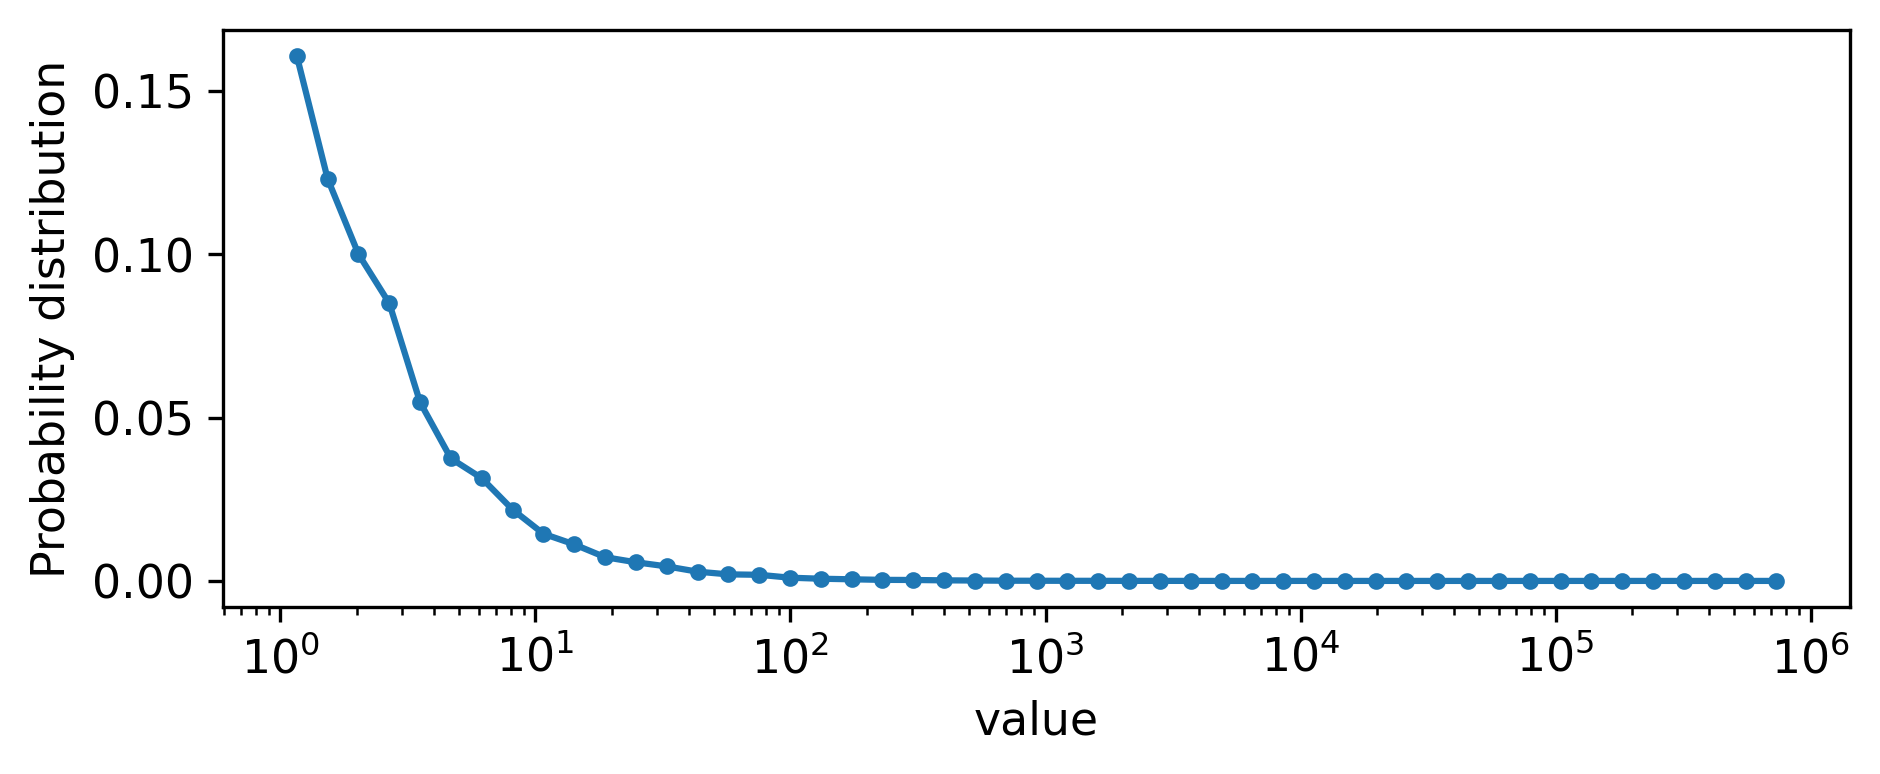

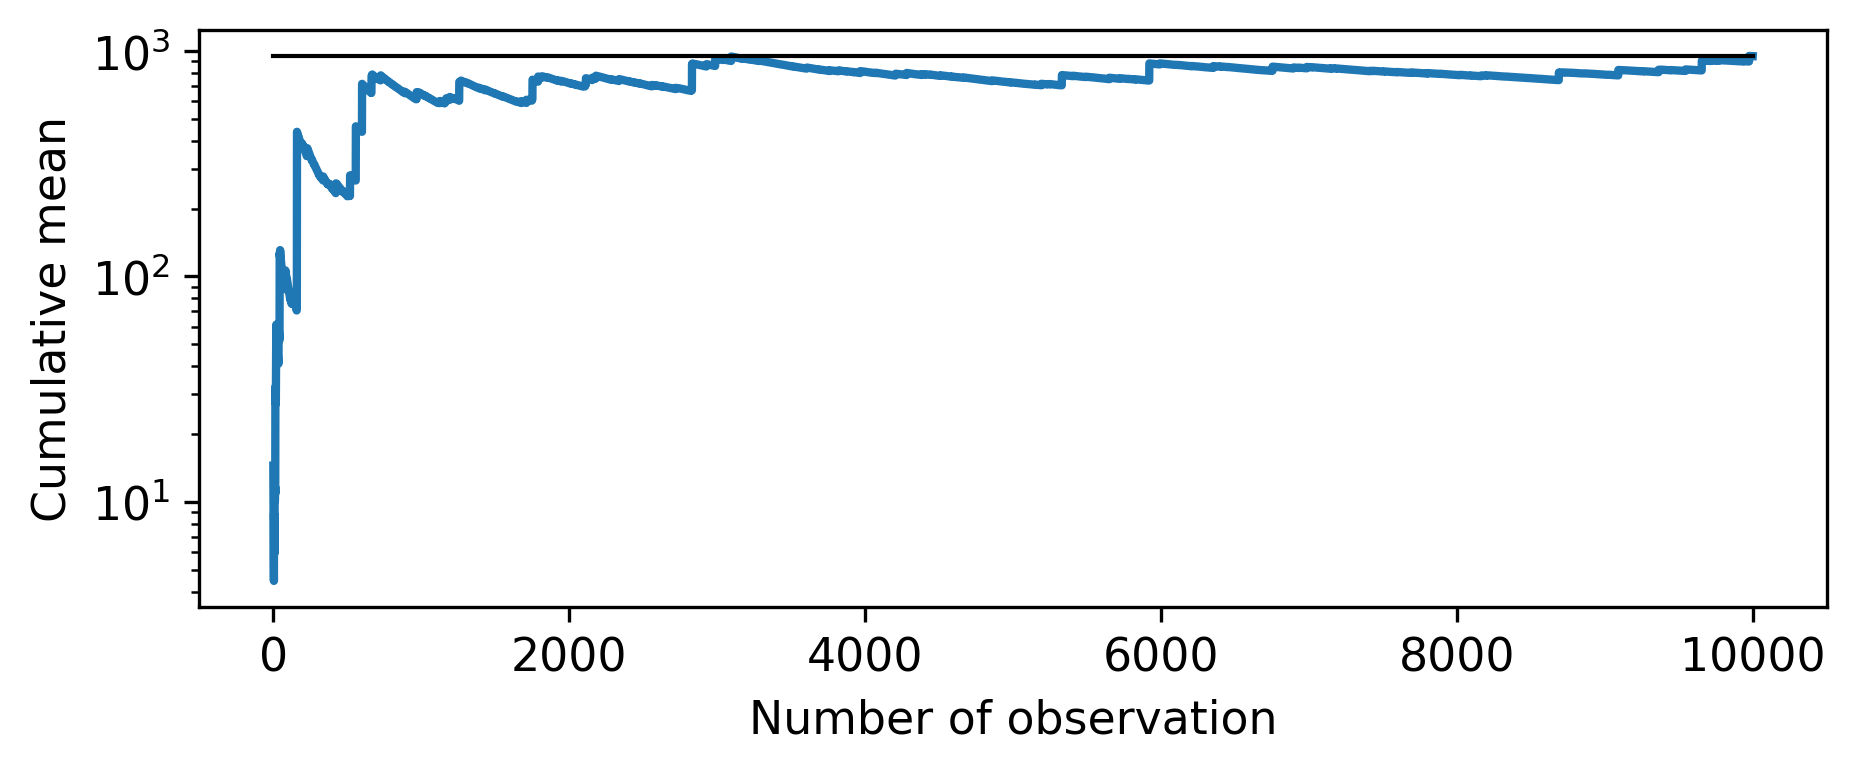

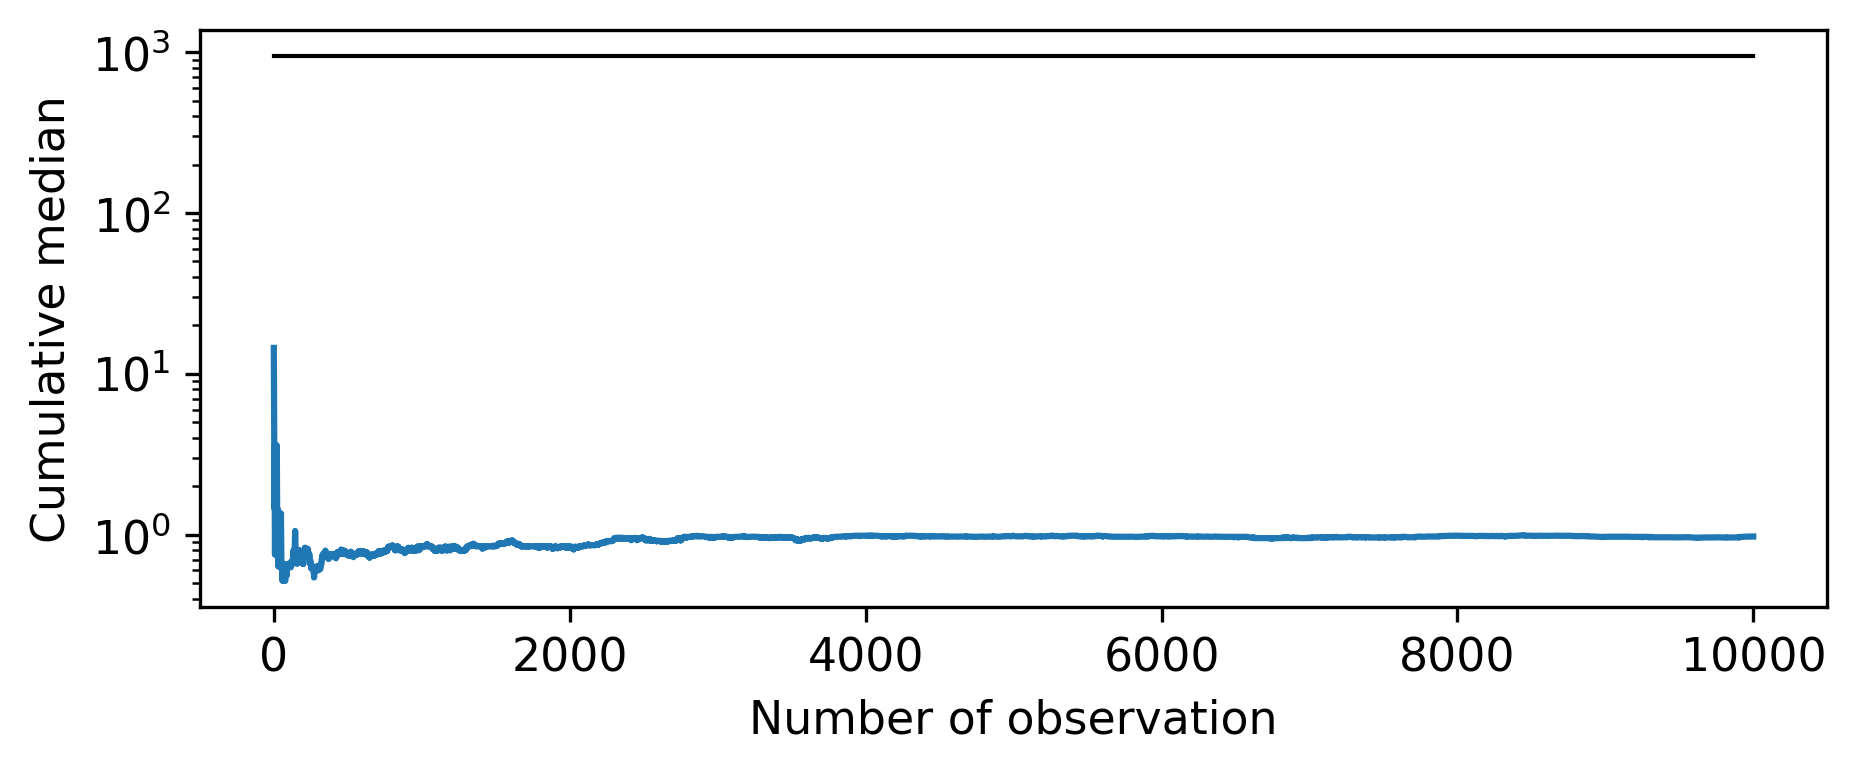

In [176]:
mu, sigma = 0, 4 # mean and standard deviation
X_logNorm = np.random.lognormal(mu, sigma, 10000)
#X_logNorm
exercise3_GPT(X_logNorm, x_log = True, y_log = True, bar_hist = False)

## 13. Compute mean and median for the citations of papers from 2009. Then, extract a random sample of N=10,000 papers.

## 14. Repeat steps 2.-8. for the paper citation sample prepared in 13. 

## What did we learn :)

### Compare the evolution of cumulative average for the Gaussian, Pareto and LogNormal distribution

##### For our gaussian distribution the cumulative mean stays constant (=mu) after around 2000 observations. The heavy tailed distributions, however, can dramatically change their cumulative mean even after several thousand observations with just one new extreme observation drafted. These "extreme observations" are many orders of magnitude higher in the case of Pareto distribution or many orders of magnitude higher OR lower in the case of the logNorm distribution. This allows them to singlehandedly influence the mean so drastically. For N=10,000, the mean of the Pareto distribution is dominated by only one or two observations. For the LogNorm distribution, several observations have a significant influence on the mean.

### Compare the cumulative median vs cumulative average for the three distributions. Which statistics is more useful in different cases?

##### The cumulative median and mean are almost identical for the Gaussian distribution. This is because the Gaussian distribution is symmetric, meaning that the mean and median will be equal for N towards infinity. Both are useful measures. However, the mean can be used to describe the distribution and to draw new samples. Furthermore, the mean is used to calculate other important statistical measures such as the variance and standard deviation. 

##### For heavy tailed distributions, however, they are very different. The mean is influenced by outliers and is often not a good representation of the center of the distribution. The median is not influenced by these "extreme observations". Therefore, with our parameters, the median of both the Pareto and the LogNorm distribution stays around zero, while the mean is never "stillstanding" when drawing new samples. Therefore, the median is less sensitive to these outliers and provides a better representation of the typical value in the distribution.

### Which observations can be made concerning the citation count data plots? What are the implications?

### What do you think are the take-home messages of this exercise?

##### - Getting a basic understanding of these three types of distributions (how means, medians, standard deviation behave with increasing sample size)

##### - Understanding the importance of outliers for heavy-tailed distributions

##### - It is important to know what underlying distribution our data has

##### - Different descriptive statistical properties have to be used when dealing with different distributions

##### - Heavy-tailed distributions are probably not as intuitively understood by human brains